In [4]:
#Setup
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (15,10)

# Lab 1

## A Little Statistics

#### Problem 1
##### A)
The normal distribution, also known as the Gaussian distribution or a Bell curve is a probability distribution for continuous variables taking parameters $(\mu, \sigma)$. The standard normal distribution is just a normal distribution with parameters $(\mu = 0, \sigma = 1)$. The equation for the standard normal distributions probability density function is $\varphi(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}z^2}$. The most familiar use of the normal distribution is probably to approximate the distribution of grades on an assignment with sufficient sample size. This sort of distribution however will likely never follow the standard normal as the mean will probably not be zero, and negative scores are not likely to show up. This requires the use of the general normal distribution with probability density function $f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$. The probability of a random value of z being in a range of values can be found by integrating the probability density function across that range. The probability for $z\leq a$ in the standard normal distribution can be found using the integral below.
$$\int_{-\infty}^{a}\varphi(z)dz$$
Since the standard normal is being used here, the values of x represent the number of $\sigma$ from the mean a value is, so by converting values using the equation below you can find the z equivalent of a value in a general normal by using $z = \frac{x-\mu}{\sigma}$

[z-score table](https://en.wikipedia.org/wiki/Standard_normal_table)
##### B)

In [25]:
print('The probability of getting 0 or below in the standard normal is',stats.norm.cdf(0,loc = 0, scale = 1))
print('The probability of getting -1 or below in the standard normal is', np.round(stats.norm.cdf(-1,loc = 0, scale = 1), 3))
print('The probability of getting 1 or below in the standard normal is', np.round(stats.norm.cdf(1,loc = 0, scale = 1),3))

The probability of getting 0 or below in the standard normal is 0.5
The probability of getting -1 or below in the standard normal is 0.159
The probability of getting 1 or below in the standard normal is 0.841


The values above match the values on the z-score table from above
##### C)

In [26]:
print('Sigma for 0.25:', np.round(stats.norm.ppf(0.25),3))
print('Sigma for 0.5080:', np.round(stats.norm.ppf(0.5080),3))
print('Sigma for 0.841:', np.round(stats.norm.ppf(0.841),3))

Sigma for 0.25: -0.674
Sigma for 0.5080: 0.02
Sigma for 0.841: 0.999


Using the z-score table from part A in reverse, these values match.
##### D)
A minus sign for sigma means that the probability of the event is less than $\frac{1}{2}$. This is because the location on the standard normal would be to the negative side of the mean.

#### Problem 2
##### A)
The Rayleigh distribution is another probability distribution for continuous random variables, but is limited to non-negative values. The Rayleigh distribution arrises from the magnitude of two independant, normally distributed, zero mean, orthogonal quantities with the same standard deviation. This can also apply when those two quantities represent the real and imaginary parts of a complex number.
The equation for the probability density of a Rayleigh distribution is $f(x;\sigma) = \frac{x}{\sigma^2}e^{-x^2/(2\sigma^2)}$ for $x\geq 0$ with $\sigma$ as a scale parameter. The location parameter in the stats package of scipy is just a translation of the Rayleigh distribution.
##### B)

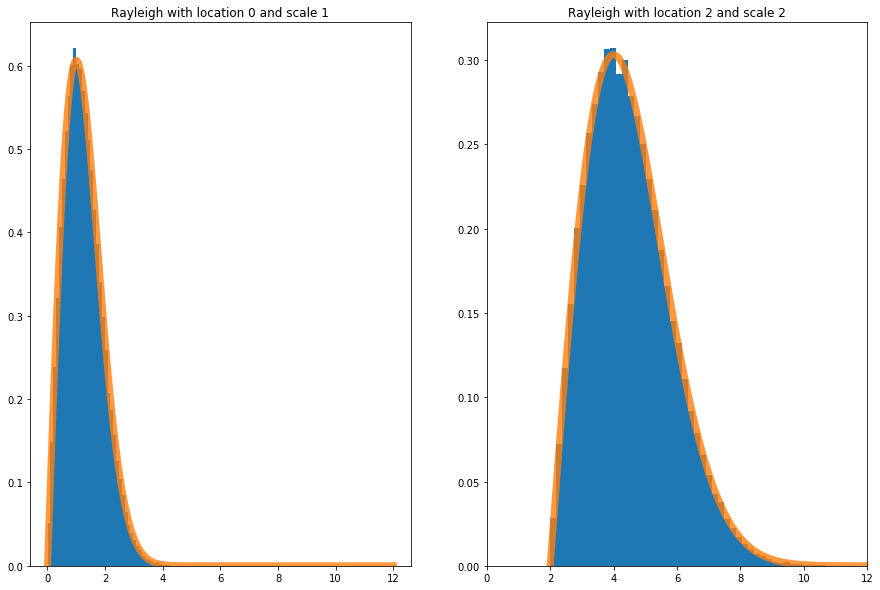

In [50]:
ray_dist = stats.rayleigh.rvs(size = 100000)
ray_dist2 = stats.rayleigh.rvs(loc = 2, scale = 2, size = 100000)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(ray_dist,50, density = True)
x = np.linspace(0,12,1000)
x2 = np.linspace(2,12,1000)
ax1.plot(x, stats.rayleigh.pdf(x), linewidth = 7, alpha = 0.8)
ax2.hist(ray_dist2,50, density = True)
ax2.plot(x2, stats.rayleigh.pdf(x2, loc = 2, scale = 2), linewidth = 7, alpha = 0.8)
plt.xlim([0,12])
ax1.title.set_text('Rayleigh with location 0 and scale 1')
ax2.title.set_text('Rayleigh with location 2 and scale 2')
plt.show()

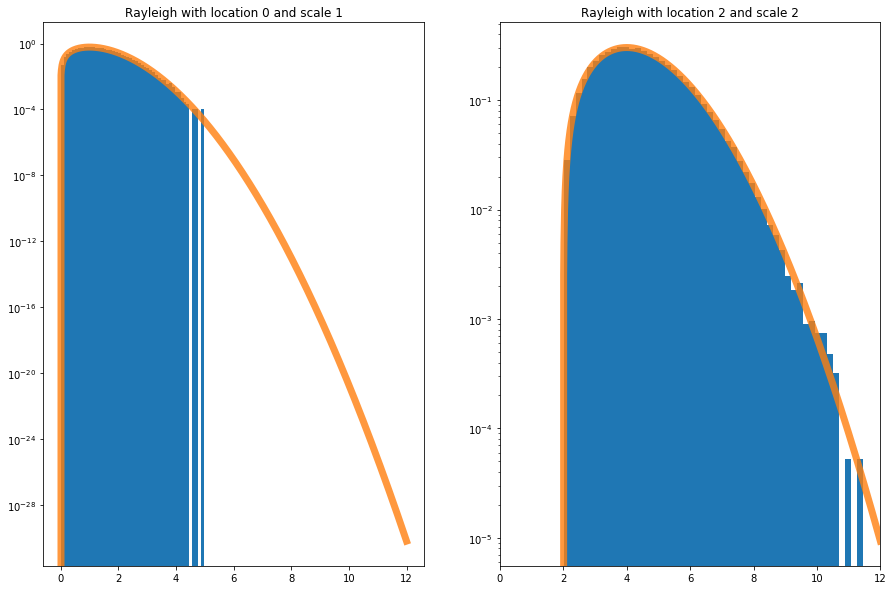

In [51]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(ray_dist,50, density = True)
ax1.semilogy(x, stats.rayleigh.pdf(x), linewidth = 7, alpha = 0.8)
ax2.hist(ray_dist2,50, density = True)
ax2.semilogy(x2, stats.rayleigh.pdf(x2, loc = 2, scale = 2), linewidth = 7, alpha = 0.8)
plt.xlim([0,12])
ax1.title.set_text('Rayleigh with location 0 and scale 1')
ax2.title.set_text('Rayleigh with location 2 and scale 2')
plt.show()

#### Problem 3
##### A)

In [9]:
measurement = 4.2

##### B)
What is the probablility that the background distribution would give a value as or more signal like than our measurement

##### C)
$$\int_{4.2}^{+\infty}xe^{-\frac{x^2}{2}}dx$$
##### D)

In [10]:
prob = stats.rayleigh.cdf(measurement)
print('Probability of the background distribution giving a value of', measurement, 'or higher is', np.format_float_scientific(1-prob, precision =3))

Probability of the background distribution giving a value of 4.2 or higher is 1.477e-04


##### E)

In [11]:
sigma = stats.norm.ppf(prob)
print('Sigma for a measurement of', measurement, 'is', np.round(sigma, 3))

Sigma for a measurement of 4.2 is 3.619


#### Problem 4

In [12]:
measurement = 2
prob = stats.rayleigh.cdf(measurement)
print('Probability of the background distribution giving a value of', measurement, 'or higher is', np.round(1-prob, 3))
sigma = stats.norm.ppf(prob)
print('Sigma for a measurement of', measurement, 'is', np.round(sigma, 3))
print()
measurement = 8
prob = stats.rayleigh.cdf(measurement)
print('Probability of the background distribution giving a value of', measurement, 'or higher is', np.format_float_scientific(1-prob, precision =3))
sigma = stats.norm.ppf(prob)
print('Sigma for a measurement of', measurement, 'is', np.round(sigma, 3))

print()
measurement = 1
prob = stats.rayleigh.cdf(measurement)
print('Probability of the background distribution giving a value of', measurement, 'or higher is', np.round(1-prob, 3))
sigma = stats.norm.ppf(prob)
print('Sigma for a measurement of', measurement, 'is', np.round(sigma, 3))

Probability of the background distribution giving a value of 2 or higher is 0.135
Sigma for a measurement of 2 is 1.102

Probability of the background distribution giving a value of 8 or higher is 1.266e-14
Sigma for a measurement of 8 is 7.62

Probability of the background distribution giving a value of 1 or higher is 0.607
Sigma for a measurement of 1 is -0.27


As the measurement gets lower in values as does the probability and $\sigma$ of the measurement.

## Non-continuous Distributions

### The Binomial Distribution
#### Problem 1
##### A)
What I learned from reading up on the binomial distribution
##### B)
note to self: insert logy plots

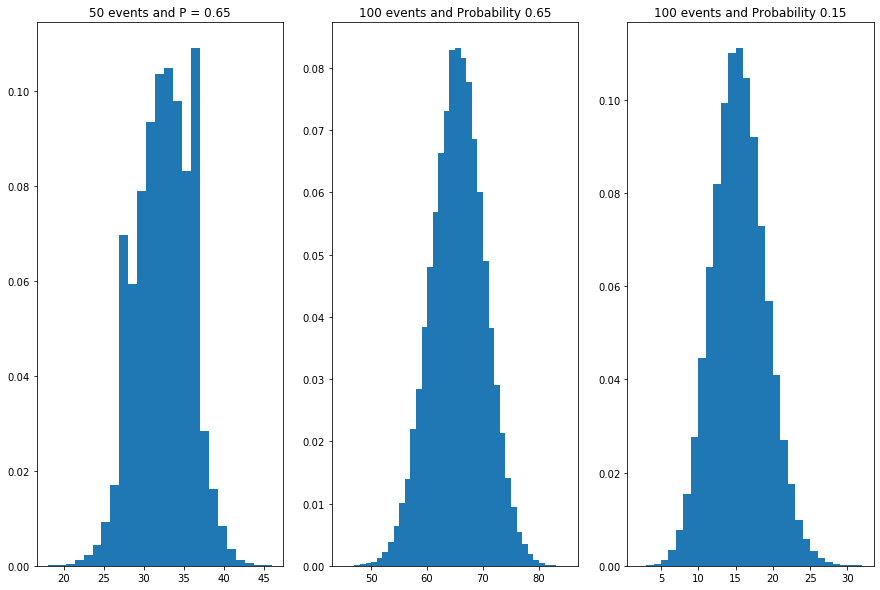

In [19]:
binom_dist1 = stats.binom.rvs(50,0.65, size = 100000)
binom_dist2 = stats.binom.rvs(100,0.65, size = 100000)
binom_dist3 = stats.binom.rvs(100,0.15, size = 100000)
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.hist(binom_dist1,bins = 25,density = True)
ax1.title.set_text('50 events and P = 0.65')
ax2.hist(binom_dist2,bins = 40,density = True)
ax2.title.set_text('100 events and Probability 0.65')
ax3.hist(binom_dist3,bins = 30,density = True)
ax3.title.set_text('100 events and Probability 0.15')

Explaination of features of plots above
##### C)
What is the probability of 75 or more events out of 100 attempts each with a probability of 0.65?

In [14]:
prob = stats.binom.cdf(75,100,0.65)
print('Probability of 75 or more events occuring is', np.round(1 - prob,4))

Probability of 75 or more events occuring is 0.0121


##### D)

In [15]:
sigma = stats.norm.ppf(prob)
print('Sigma of 75 or more events occuring is', np.round(sigma,3))

Sigma of 75 or more events occuring is 2.253


Implications of discrete probabilities and sigmas
##### E)
Discussion about continuous nature of some parameters of the distribution like its mean